### 教育策略優化與閱讀系統效益評估
- 分析對象：同一組學生連續兩年的閱讀表現
- 目標：根據閱讀表現提出：(1)教學策略調整；(2)閱讀系統使用優化

`原始資料集（df1, df2020, etc.）因涉及個資，因此僅以最後成果sample_data作為範例呈現`

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設定好中文字體以在圖表中顯示
import matplotlib
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'

##### 第一步：處理2020年的資料

In [ ]:
# 讀取2020年的第一份資料，只讀取需要的分頁
xls = pd.ExcelFile('閱讀力2020.xlsx')
sheet_names = xls.sheet_names
df1 = pd.read_excel('閱讀力2020.xlsx', sheet_name='G6')

# 去除不會用到的欄
df1 = df1.drop(['user_sn', '規劃力PR', '執行力PR', '博學力PR', '精進力PR', '力總和PR', '兩力PR平均', '年級排名'], axis = 1)

# 初步清理
df1 = df1.drop([63, 64, 65, 66], axis=0)
df1['班級'] = df1['班級'].replace('6', '', regex=True)

df1.head()

In [ ]:
# 讀取2020年的第二份資料，只讀取需要的分頁
xls = pd.ExcelFile('閱讀計畫2020.xlsx')
sheet_names = xls.sheet_names
df2 = pd.read_excel('閱讀計畫2020.xlsx', sheet_name='G6')

# 去除不會用到的欄
df2 = df2.drop(['書單修改日期', '待批閱數', '20210528金榜星星數', '已通過比率', '最新評量日期', '20201218金榜星星數', '班上排名', '進步獎'], axis=1)

# 初步清理
df2 = df2.drop(['最新DACC分數'], axis=1)
df2 = df2.drop([64, 65, 66, 67], axis=0)

df2.head()

In [ ]:
# 合併
df2020 = pd.merge(df1, df2, on='姓名', how='outer')
df2020 = df2020.drop([63], axis=0)
df2020.head()

In [ ]:
# 重新命名欄
df2020 = df2020.drop(['年級_y', '班級_y'], axis=1)

df2020 = df2020.rename(columns={'年級_x': 'class_year', '班級_x': 'class_name', '姓名': 'student', '計畫書籍總數': 'book_planned', '已通過書籍數': 'book_passed', 'A+次數': 'A+', 'A次數': 'A', 'B次數': 'B', '規劃力': 'planning', '執行力': 'execution',
       '博學力': 'knowledge', '精進力': 'improvement', '力總和': 'total_skills', '本次金榜星星數': 'honor_given', '參照DACC分數': 'final_score'})

# 將資料標記2020，以便後續和其他資料合併時仍可識別
df2020['year'] = 2020

# 排欄位順序
new_order = ['student', 'year', 'class_year', 'class_name', 'book_planned', 'book_passed', 'A+', 'A', 'B',
       'planning', 'execution', 'knowledge', 'improvement', 'total_skills',
       'honor_given', 'final_score',]
df2020 = df2020[new_order]

df2020.head()

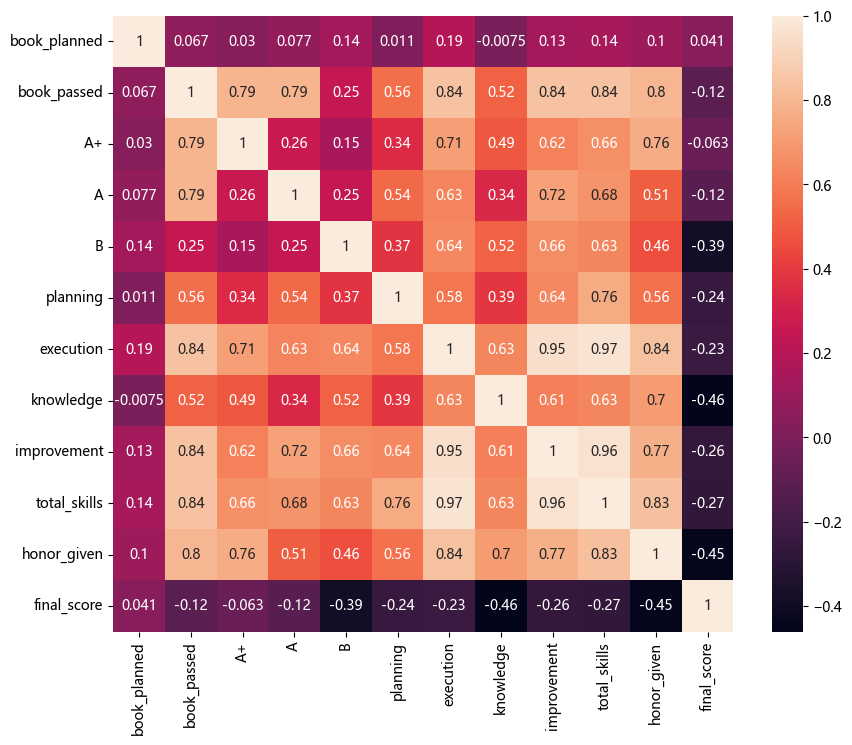

In [82]:
# 檢視數值間的關聯性，初步觀察各項
df2020_number = df2020[['book_planned','book_passed', 'A+', 'A', 'B',  
                        'planning', 'execution', 'knowledge','improvement', 
                        'total_skills', 'honor_given', 'final_score']]

plt.figure(figsize=(10, 8))
sns.heatmap(df2020_number.corr(), annot=True)
plt.show()

##### 第二步：處理2021年資料

In [ ]:
# 讀取2021年的第一份資料，只讀取需要的分頁
xls = pd.ExcelFile('閱讀力2021.xlsx')
sheet_names = xls.sheet_names
df3 = pd.read_excel('閱讀力2021.xlsx', sheet_name='G7')

# 去除不會用到的欄
df3 = df3.drop(['規劃力PR', '執行力PR', '博學力PR', '精進力PR', '力總和PR', '兩力PR平均', '年級排名'], axis = 1)

# 初步清理
df3 = df3.drop([0], axis=0)

df3.head()

In [ ]:
# 讀取2021年的第一份資料，只讀取需要的分頁
xls = pd.ExcelFile('閱讀計畫2021.xlsx')
sheet_names = xls.sheet_names
df4 = pd.read_excel('閱讀計畫2021.xlsx', sheet_name='G7')

# 去除不會用到的欄
df4 = df4.drop(['最新DA分數', '書單修改日期', '待批閱數', '20220506金榜星星數', '已通過比率', '最新評量日期', '20211230金榜星星數', '上學期金榜星星數', '進步'], axis=1)

# 初步清理
df4 = df4.drop([0], axis=0)

df4.head()

In [ ]:
# 合併
df2021 = pd.merge(df3, df4, on='姓名', how='outer')
df2021.head()

In [ ]:
# 重新命名欄
df2021 = df2021.drop(['年級_y', '班級_y'], axis=1)

df2021 = df2021.rename(columns={'年級_x': 'class_year', '班級_x': 'class_name', '姓名': 'student', '計畫書籍總數': 'book_planned', '已通過書籍數': 'book_passed', 'A+次數': 'A+', 'A次數': 'A', 'B次數': 'B', '規劃力': 'planning', '執行力': 'execution',
       '博學力': 'knowledge', '精進力': 'improvement', '力總和': 'total_skills', '本次金榜星星數': 'honor_given', '參照DACC分數': 'final_score'})

# 將資料標記2020，以便後續和其他資料合併時仍可識別
df2021['year'] = 2021

# 排欄位順序
new_order = ['student', 'year', 'class_year', 'class_name', 'book_planned', 'book_passed', 'A+', 'A', 'B',
       'planning', 'execution', 'knowledge', 'improvement', 'total_skills',
       'honor_given', 'final_score',]
df2021 = df2021[new_order]

df2021.head()

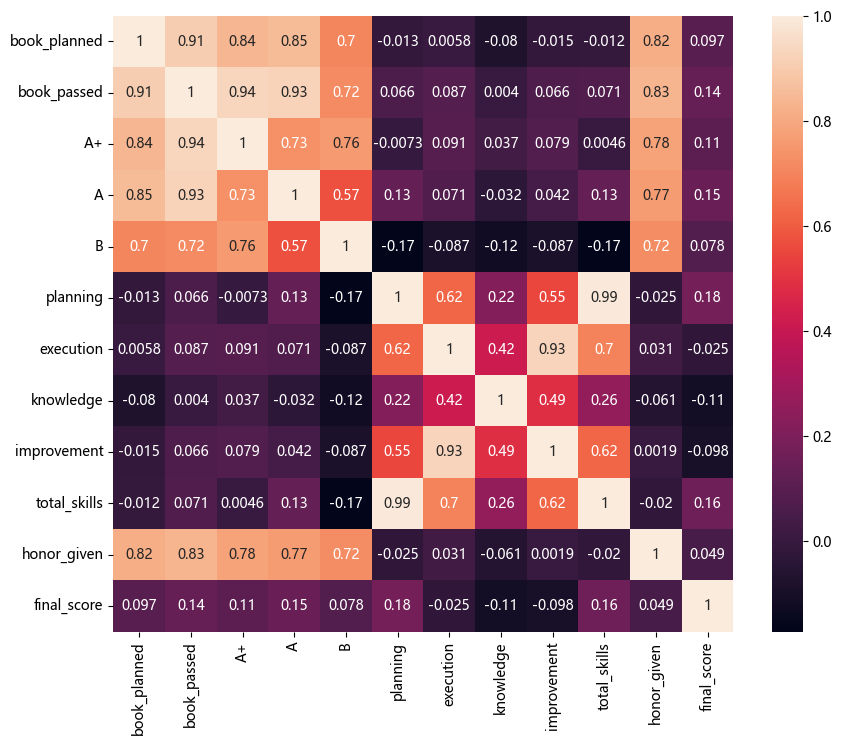

In [83]:
# 檢視數值間的關聯性，初步觀察各項
df2021_number = df2021[['book_planned','book_passed', 'A+', 'A', 'B',  
                        'planning', 'execution', 'knowledge','improvement', 
                        'total_skills', 'honor_given', 'final_score']]

plt.figure(figsize=(10, 8))
sns.heatmap(df2021_number.corr(), annot=True)
plt.show()

##### 第三步：處理兩年的資料

In [10]:
# 將使用者依照就讀時間分類，以進一步比較各現表現
# 確定在兩個資料框中都出現的名字
check = pd.merge(df2020, df2021, on='student')['student']

# 兩年都在學的代號為B（Both）
name_both = {name: f"B{i+1}" for i, name in enumerate(check)}

# 只讀到2020年的代號為L（Left）
till_2020 = df2020[~df2020['student'].isin(check)]['student']
name_left = {name: f"L{i+1}" for i, name in enumerate(till_2020)}

# 只讀到2020年的代號為N（New）
arrive_2021 = df2021[~df2021['student'].isin(check)]['student']
name_new = {name: f"N{i+1}" for i, name in enumerate(arrive_2021)}

# 結合所有代號
all_name = {**name_both, **name_left, **name_new}

# 將名字改成代號
df2020['student'] = df2020['student'].map(all_name)
df2021['student'] = df2021['student'].map(all_name)

In [11]:
# 將名字從df2020和df2021取出
name_2020 = set(df2020['student'])
name_2021 = set(df2021['student'])

# 找出只在 name_2020、只在 name_2021、以及在兩個資料都有的名字
only_2020 = name_2020 - name_2021
only_2021 = name_2021 - name_2020
both_years = name_2020 & name_2021

# 在 df2020 和 df2021 中新增一個欄位來標記這些類別：L（只讀2020年）、N（只讀2021年）、B（兩年都在學）
df2020['study_year'] = df2020['student'].apply(lambda x: 'L' if x in only_2020 else 'B')
df2021['study_year'] = df2021['student'].apply(lambda x: 'N' if x in only_2021 else 'B')


In [12]:
# 合併成一個資料
sr = pd.concat([df2020, df2021], ignore_index=True)


In [13]:
# 存成csv，以供後續使用
sr.to_csv('sr.csv', index=False)
df2020.to_csv('df2020.csv', index=False)
df2021.to_csv('df2021.csv', index=False)

##### 第四步：視覺化與分析

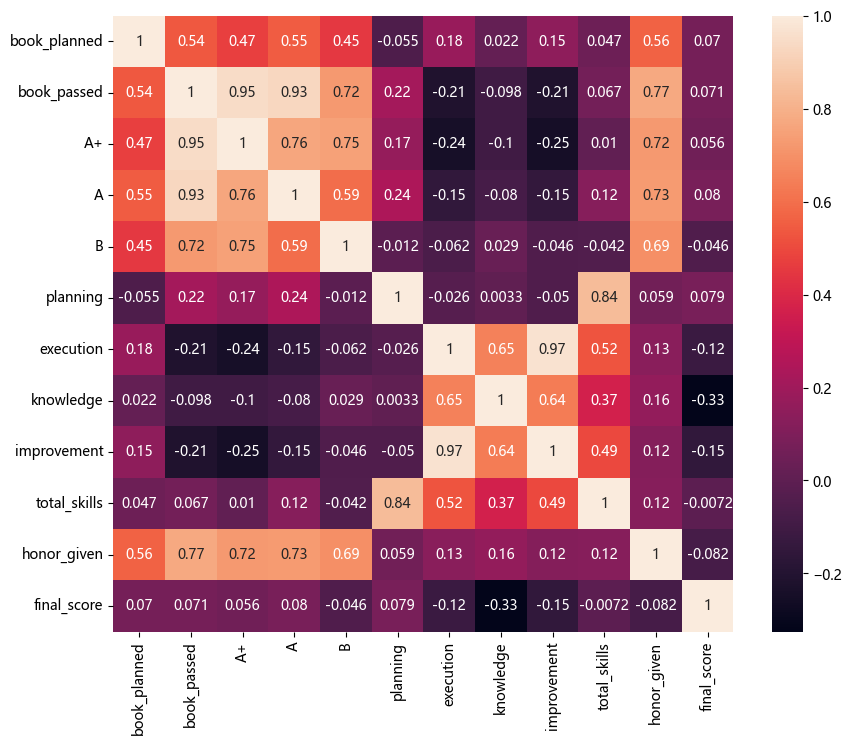

In [85]:
# 檢視數值間的關聯性
sr_number = sr[['book_planned','book_passed', 'A+', 'A', 'B',  
                        'planning', 'execution', 'knowledge','improvement', 
                        'total_skills', 'honor_given', 'final_score']]

plt.figure(figsize=(10, 8))
sns.heatmap(sr_number.corr(), annot=True)
plt.show()

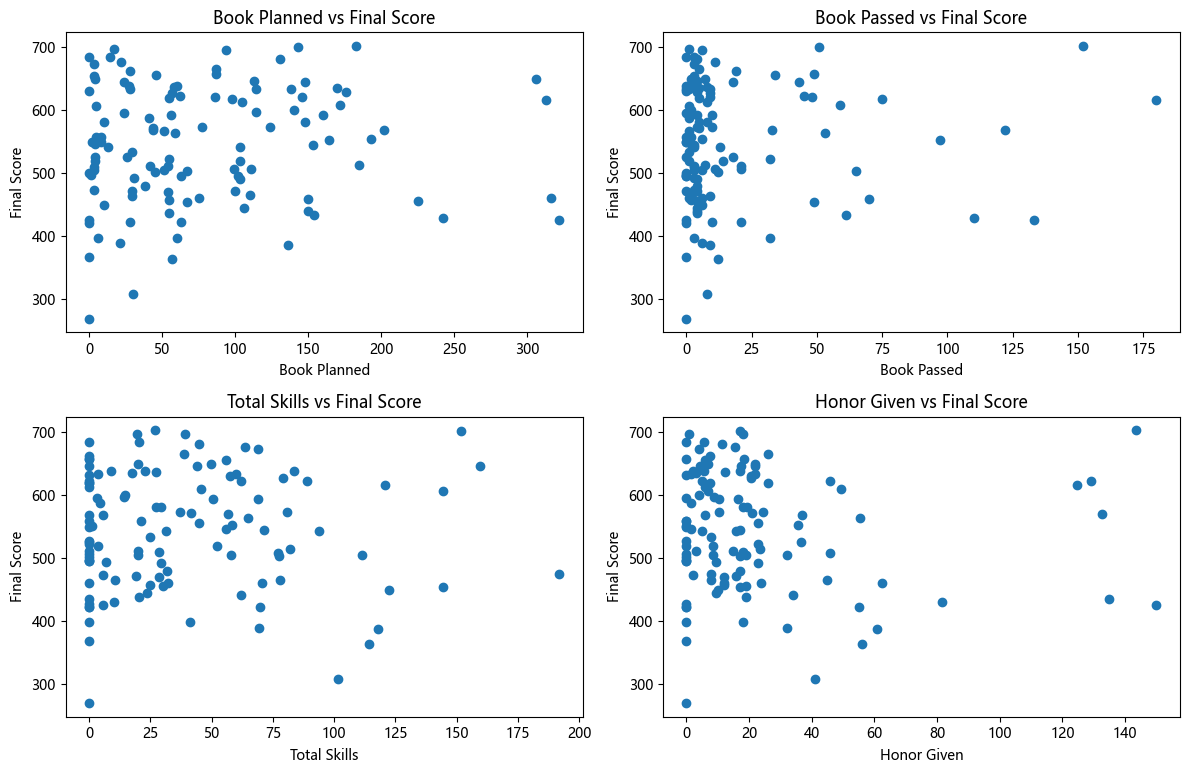

In [120]:
# 根據上圖，進一步觀察幾個項目
# 比較最終成績與「book_planned、book_passed、total_skills」之間的關係
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

columns_to_plot = ['book_planned','book_passed', 'total_skills', 'honor_given']

for i, ax in enumerate(axes.ravel()):
    column = columns_to_plot[i]
    ax.scatter(sr[column], sr['final_score'])  # label=f'{column} vs final_score'
    ax.set_title(f'{column.replace("_", " ").title()} vs Final Score')
    ax.set_xlabel(f'{column.replace("_", " ").title()}')
    ax.set_ylabel('Final Score')
    # ax.set_ylabel('final_score')
    # ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# 結果顯示相關性不足，待進一步於報告中討論

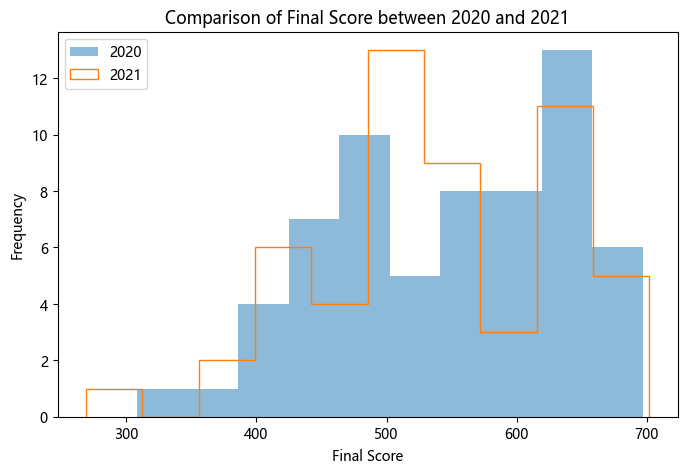

In [132]:
# 2020與2021年的成績分佈比較
data_2020 = sr[sr['year'] == 2020]['final_score']
data_2021 = sr[sr['year'] == 2021]['final_score']

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(data_2020, bins=10, alpha=0.5, label='2020')
ax.hist(data_2021, bins=10, histtype='step', label='2021')

ax.legend()
ax.set_xlabel('Final Score')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Final Score between 2020 and 2021')

plt.show()

# 整體差異沒有顯著性，但2021年約600分的人數明顯下降，待進一步於報告中討論

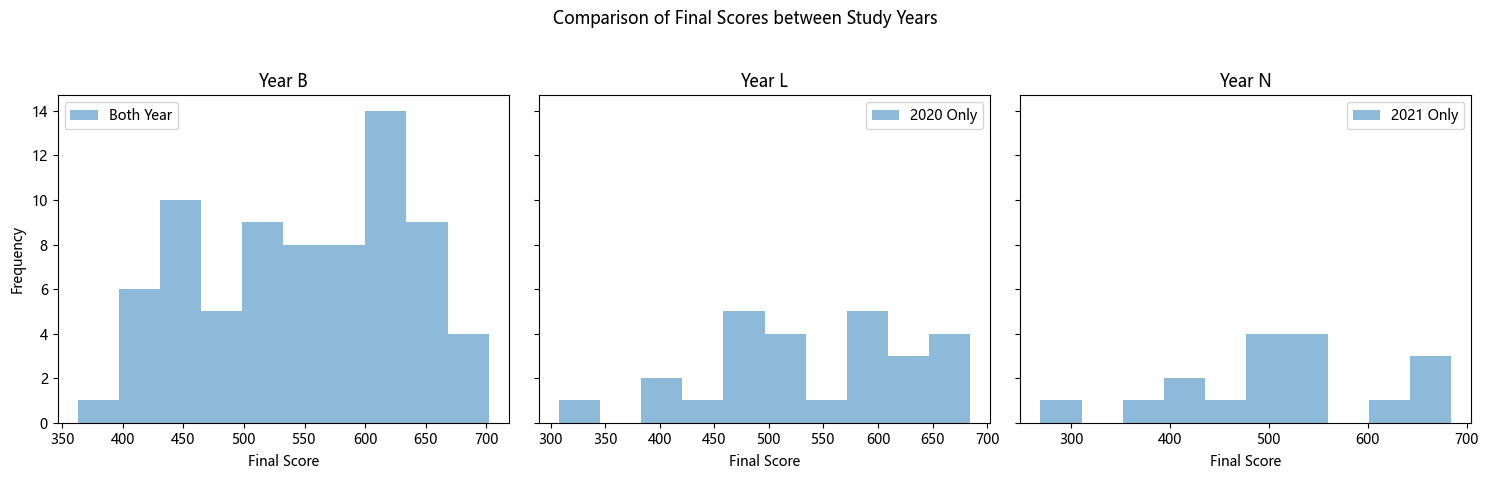

In [64]:
# 不同就讀時間的使用者之成績比較
# 獲取不同學年的成績
data_b = sr[sr['study_year'] == 'B']['final_score']
data_l = sr[sr['study_year'] == 'L']['final_score']
data_n = sr[sr['study_year'] == 'N']['final_score']

# 創建一個子圖，1行3列
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# 學年B的成績分佈
axes[0].hist(data_b, bins=10, alpha=0.5, label='Both Year')
axes[0].set_title('Year B')
axes[0].set_xlabel('Final Score')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# 學年L的成績分佈
axes[1].hist(data_l, bins=10, alpha=0.5, label='2020 Only')
axes[1].set_title('Year L')
axes[1].set_xlabel('Final Score')
axes[1].legend()

# 學年N的成績分佈
axes[2].hist(data_n, bins=10, alpha=0.5, label='2021 Only')
axes[2].set_title('Year N')
axes[2].set_xlabel('Final Score')
axes[2].legend()

# 設置總標題
plt.suptitle('Comparison of Final Scores between Study Years')

# 顯示圖表
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 觀察結果在預期範圍內，然分數差異大

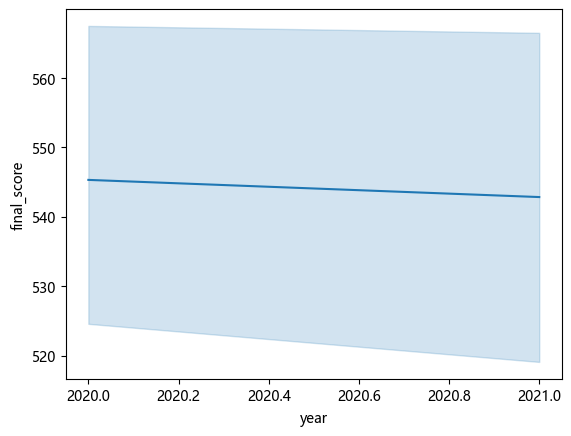

In [71]:
# 確認兩年的成績表現
sns.lineplot(data=sr, x='year', y='final_score')
plt.show()

# 在預期結果中

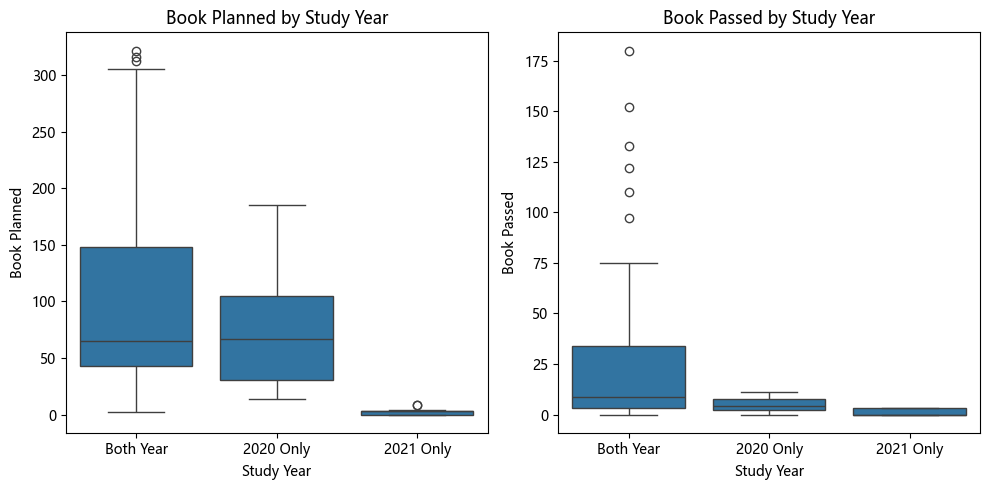

In [130]:
# 「計畫書籍、通過書籍」在不同就讀年份的分佈
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 計畫書籍（左圖）
sns.boxplot(data=sr, x='study_year', y='book_planned', ax=axes[0])
axes[0].set_title('Book Planned by Study Year')
axes[0].set_xlabel('Study Year')
axes[0].set_ylabel('Book Planned')
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['Both Year', '2020 Only', '2021 Only'])

# 通過書籍（右圖）
sns.boxplot(data=sr, x='study_year', y='book_passed', ax=axes[1])
axes[1].set_title('Book Passed by Study Year')
axes[1].set_xlabel('Study Year')
axes[1].set_ylabel('Book Passed')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['Both Year', '2020 Only', '2021 Only'])

plt.tight_layout()
plt.show()

# 須進一步分析結果

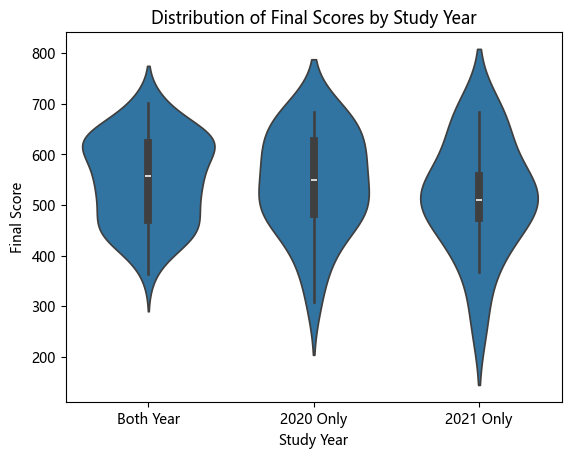

In [123]:
# 比較就讀年份和最終成績的差異
sns.violinplot(data=sr, x='study_year', y='final_score')
plt.title('Distribution of Final Scores by Study Year')
plt.xlabel('Study Year')
plt.ylabel('Final Score')
plt.xticks([0, 1, 2], ['Both Year', '2020 Only', '2021 Only'])
plt.show()

# 結合上一張圖分析